## Libraries

In [1]:
import pandas as pd
from IPython.display import Image
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as normal
from scipy.stats import skew,kurtosis

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import linear_model

In [2]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [3]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train_data.shape

(1460, 81)

In [7]:
houses_data = train_data.append(test_data,ignore_index=True)#.reset_index(drop=True)
np.unique(houses_data.index)

C:\Users\dusic\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


array([   0,    1,    2, ..., 2916, 2917, 2918], dtype=int64)

In [8]:
houses_data.shape

(2919, 81)

In [9]:
houses_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

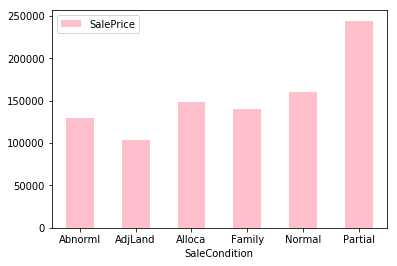

In [10]:
SaleCondition_pivot=houses_data.pivot_table(index='SaleCondition',
values='SalePrice',aggfunc=np.median)
SaleCondition_pivot.plot(kind='bar',color='pink')
plt.xticks(rotation=0)

In [11]:
houses_data['SaleCondition_d']=np.where(houses_data['SaleCondition']!='Partial',0,1)
#test_data['SaleCondition_d']=np.where(test_data['SaleCondition']!='Partial',0,1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

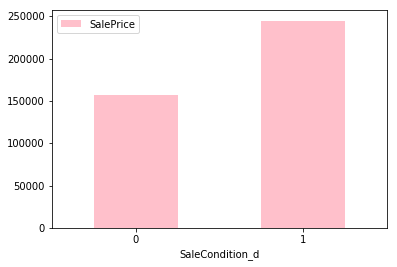

In [12]:
SaleCondition_pivot=houses_data.pivot_table(index='SaleCondition_d',
values='SalePrice',aggfunc=np.median)
SaleCondition_pivot.plot(kind='bar',color='pink')
plt.xticks(rotation=0)

In [13]:
houses_data.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [14]:
# Definitely ignoring Utilities: all records are "AllPub", except for
    # one "NoSeWa" in the train set and 2 NA in the test set.

In [15]:
houses_data["SalePrice"].groupby(houses_data["Neighborhood"]).median().sort_values()

Neighborhood
MeadowV     88000.0
IDOTRR     103000.0
BrDale     106000.0
OldTown    119000.0
Edwards    121750.0
BrkSide    124300.0
Sawyer     135000.0
Blueste    137500.0
SWISU      139500.0
NAmes      140000.0
NPkVill    146000.0
Mitchel    153500.0
SawyerW    179900.0
Gilbert    181000.0
NWAmes     182900.0
Blmngtn    191000.0
CollgCr    197200.0
ClearCr    200250.0
Crawfor    200624.0
Veenker    218000.0
Somerst    225500.0
Timber     228475.0
StoneBr    278000.0
NoRidge    301500.0
NridgHt    315000.0
Name: SalePrice, dtype: float64

In [16]:
train_data["SalePrice"].groupby(train_data["Neighborhood"]).median().sort_values()

Neighborhood
MeadowV     88000
IDOTRR     103000
BrDale     106000
OldTown    119000
Edwards    121750
BrkSide    124300
Sawyer     135000
Blueste    137500
SWISU      139500
NAmes      140000
NPkVill    146000
Mitchel    153500
SawyerW    179900
Gilbert    181000
NWAmes     182900
Blmngtn    191000
CollgCr    197200
ClearCr    200250
Crawfor    200624
Veenker    218000
Somerst    225500
Timber     228475
StoneBr    278000
NoRidge    301500
NridgHt    315000
Name: SalePrice, dtype: int64

In [19]:
cols=houses_data.columns

for col in cols:
    print(col,houses_data[col].value_counts())

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

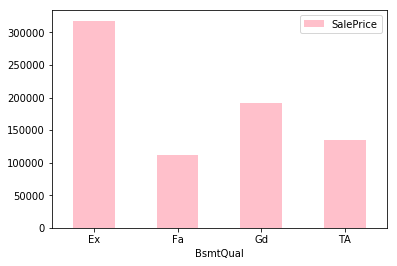

In [20]:
i=14 #2
SaleCondition_pivot=houses_data.pivot_table(index=cols[i],
values='SalePrice',aggfunc=np.median)
SaleCondition_pivot.plot(kind='bar',color='pink')
plt.xticks(rotation=0)

There are different ways to handle the missing values(**nan** values). The first one is to **drop the columns** with missing values. The second one is to **drop the rows** with the missing values, and third is to **impute** those missing values.

## Target Variable

The analysis of the variable we need to predict!!!

In [21]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:
print('kurtosis',kurtosis(train_data.SalePrice),'skewness',
skew(train_data.SalePrice)) 

kurtosis 6.509812011089439 skewness 1.880940746034036


C:\Users\dusic\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


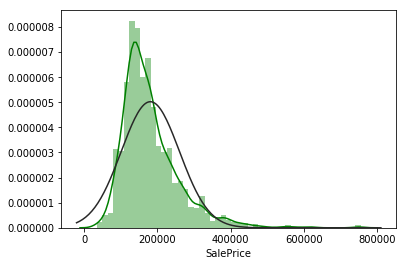

In [23]:
sns.distplot(train_data.SalePrice,color="green",fit=normal)

transforming the dependent variable. 


Multiple regression works most reliably when the inputs come in a form that is the well-known distribution of the data . 

In order to make the variable better fit the assumptions underlying regression, we need to transform it. There are a number of ways to do this, but the most common for our purposes is to take the log of ‘Giving’. (This is easily done in Data Desk using a derived variable and the ‘log’ statement; just remember to take the log of ‘Giving’ plus a nominal value of 1, because you can’t take a log of zero.) When we call up a histogram of ‘Log of Lifetime Giving’, we can see that the distribution is significantly closer to the normal probability distribution. It’s a bit skewed to one side, but it’s a big improvement.


The distribution of the target variable is positively skewed.
We will perform the log-transform of the target variable in order to 
improve the linearity of the data.

BUT ALSO, predictions of the final model would also be log-transformed 
so before submission values of the predictions will be converted 
back to their original form

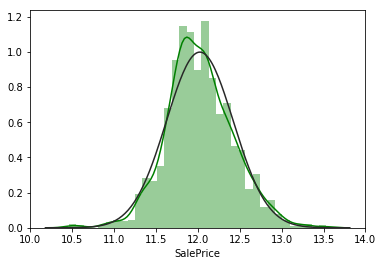

In [24]:
sns.distplot(np.log1p(train_data.SalePrice),color="green",fit=normal)

In [25]:
houses_data.SalePrice=houses_data.SalePrice.fillna(0)

In [26]:
houses_data.SalePrice=np.log1p(houses_data.SalePrice)

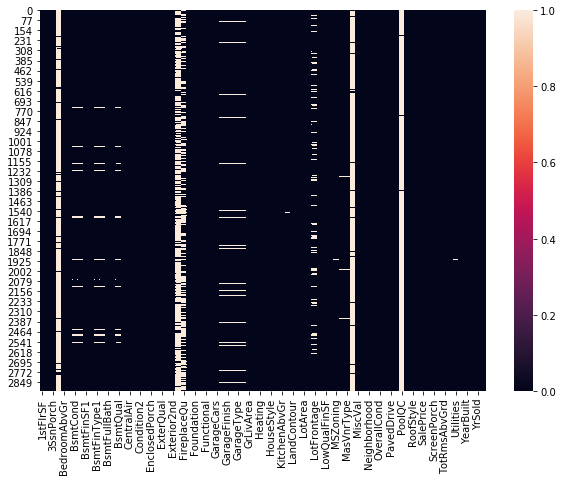

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(houses_data.isnull())

### Imputing missing values


In [28]:
houses_data.PoolQC.describe()

count     10
unique     3
top       Ex
freq       4
Name: PoolQC, dtype: object

In [29]:
houses_data.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

PoolQC: Pool quality can have different values:

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
    
Since NA means there is no pool at the house. We will replace it with 'None' and then it will be used to make dummy variables and encoding categorical variable into a binary one.

In [30]:
houses_data.PoolQC=houses_data.PoolQC.fillna("None")

In [31]:
houses_data.MiscFeature.describe()

count      105
unique       4
top       Shed
freq        95
Name: MiscFeature, dtype: object

In [32]:
houses_data.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
Since NA means there is no pool at the house. We will replace it with 'None' and then it will be used to make dummy variables and encoding categorical variable into a binary one.

In [33]:
houses_data.MiscFeature=houses_data.MiscFeature.fillna("None")

In [34]:
houses_data.Alley.describe()

count      198
unique       2
top       Grvl
freq       120
Name: Alley, dtype: object

In [35]:
houses_data.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
Since NA means there is no pool at the house. We will replace it with 'None' and then it will be used to make dummy variables and encoding categorical variable into a binary one.

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       

In [36]:
houses_data.Fence=houses_data.Fence.fillna("None")

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [37]:
houses_data.FireplaceQu=houses_data.FireplaceQu.fillna("None")

In [38]:
is_null_cols=houses_data.isnull()
a=(is_null_cols.sum()/len(is_null_cols)*100).sort_values(axis=0, ascending=False) 
a[a.apply(lambda x: x>0)]

Alley           93.216855
LotFrontage     16.649538
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Exterior1st      0.034258
GarageCars       0.034258
GarageArea       0.034258
Exterior2nd      0.034258
KitchenQual      0.034258
Electrical       0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
SaleType         0.034258
BsmtFinSF1       0.034258
dtype: float64

In [39]:
x=houses_data.isnull().sum()
x[x>0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

GarageYrBlt       

The influence of the information is important. If NA is replaced with the 0 it means that there is NO garage therefore year of building it can't exist! And also for GarageArea and GarageCars...if we assume that NA means that there is no garage, then area of garage is 0 and number of garage cars is also 0.

In [40]:
def fill_with_zero(column_lst):
    for column in column_lst:
        houses_data[column]=houses_data[column].fillna(0)

In [41]:
def fill_with_none(column_lst):
    for column in column_lst:
        houses_data[column]=houses_data[column].fillna("None")

In [42]:
zero_cols=["GarageCars","GarageArea","GarageYrBlt"]
fill_with_zero(zero_cols)

In [43]:
none_cols=["Alley","BsmtQual","BsmtCond","BsmtExposure",'BsmtFinType1''',"BsmtFinType2",
"FireplaceQu","GarageType","GarageFinish","GarageCond","PoolQC","Fence",'GarageQual']
fill_with_none(none_cols)

UKRALA PA IZMENI!!

In [44]:
houses_data["LotFrontage"] = houses_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [45]:
zero_cols=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
fill_with_zero(zero_cols)

In [46]:
houses_data.Electrical.describe()

count      2918
unique        5
top       SBrkr
freq       2671
Name: Electrical, dtype: object

In [47]:
(houses_data.Electrical=='SBrkr').sum()

2671

In [48]:
houses_data['Electrical'].value_counts().index[0]

'SBrkr'

In [49]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
houses_data['Electrical'] = houses_data['Electrical'].fillna(houses_data['Electrical'].value_counts().index[0])

In [50]:
houses_data['Exterior1st'] = houses_data['Exterior1st'].fillna(houses_data['Exterior1st'].value_counts().index[0])

In [51]:
houses_data['Exterior2nd'] = houses_data['Exterior2nd'].fillna(houses_data['Exterior2nd'].value_counts().index[0])

In [52]:
houses_data['KitchenQual'] = houses_data['KitchenQual'].fillna(houses_data['KitchenQual'].value_counts().index[0])

In [53]:
houses_data['SaleType'] = houses_data['SaleType'].fillna(houses_data['SaleType'].value_counts().index[0])

In [54]:
#Functional : data description says NA means typical
houses_data["Functional"] = houses_data["Functional"].fillna("Typ")

In [55]:
houses_data.Functional.describe()

count     2919
unique       7
top        Typ
freq      2719
Name: Functional, dtype: object

In [56]:
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
houses_data = houses_data.drop(['Utilities'], axis=1)

In [57]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
houses_data['MSZoning'] = houses_data['MSZoning'].fillna(houses_data['MSZoning'].value_counts().index[0])

In [58]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
houses_data["MasVnrType"] = houses_data["MasVnrType"].fillna("None")
houses_data["MasVnrArea"] = houses_data["MasVnrArea"].fillna(0)

In [59]:
houses_data.GarageArea=houses_data.GarageArea.fillna(0)

In [60]:
#houses_data=houses_data.select_dtypes(include=np.number).interpolate().dropna()


In [61]:
houses_data.GarageQual

0         TA
1         TA
2         TA
3         TA
4         TA
5         TA
6         TA
7         TA
8         Fa
9         Gd
10        TA
11        TA
12        TA
13        TA
14        TA
15        TA
16        TA
17        TA
18        TA
19        TA
20        TA
21        TA
22        TA
23        TA
24        TA
25        TA
26        TA
27        TA
28        TA
29        Fa
        ... 
2889      TA
2890      TA
2891    None
2892    None
2893    None
2894      TA
2895      TA
2896      TA
2897      TA
2898      TA
2899      TA
2900      TA
2901      TA
2902      TA
2903      TA
2904      Fa
2905      TA
2906      TA
2907      TA
2908      TA
2909    None
2910      TA
2911      TA
2912      TA
2913    None
2914    None
2915      TA
2916      TA
2917    None
2918      TA
Name: GarageQual, Length: 2919, dtype: object

In [62]:
qual_dict = {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}


In [63]:

houses_data["ExterQual"] = houses_data["ExterQual"].map(qual_dict).astype(int)
houses_data["ExterCond"] = houses_data["ExterCond"].map(qual_dict).astype(int)


In [64]:
houses_data["BsmtQual"] = houses_data["BsmtQual"].map(qual_dict).astype(int)
houses_data["BsmtCond"] = houses_data["BsmtCond"].map(qual_dict).astype(int)
houses_data["HeatingQC"] = houses_data["HeatingQC"].map(qual_dict).astype(int)
houses_data["KitchenQual"] = houses_data["KitchenQual"].map(qual_dict).astype(int)
houses_data["FireplaceQu"] = houses_data["FireplaceQu"].map(qual_dict).astype(int)

In [65]:
houses_data["GarageQual"] = houses_data["GarageQual"].map(qual_dict).astype(int)

In [66]:
houses_data["GarageCond"] = houses_data["GarageCond"].map(qual_dict).astype(int)

In [67]:
houses_data["BsmtExposure"] = houses_data["BsmtExposure"].map({'None': 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

#TRY to encode into numers the ranked categories
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(['a','b','b','c','d'])
le.transform(['d','b','c','a'])

def LabelEncoderFitter(columns,fit_lst): 
    for col in columns:
        le=LabelEncoder()
        vals=list(houses_data[col].values)
        le.fit(fit_lst)
        houses_data[col]=le.transform(vals)

cols=['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond','PoolQC'],
for col in cols:
    print(houses_data[col].isnull().sum())

cols=['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond','PoolQC']

for col in cols:
    houses_data[col].replace(['0', 0], ['None','None'], inplace=True)

LabelEncoderFitter(['LotShape'],['IR3','IR2','IR1','Reg'])

LabelEncoderFitter(['LandSlope'],['Gtl','Mod','Sev'])

LabelEncoderFitter(['ExterQual','ExterCond','HeatingQC','KitchenQual'],['Po','Fa','TA','Gd','Ex'])

LabelEncoderFitter(['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond','PoolQC'],['None','Po','Fa','TA','Gd','Ex'])

LabelEncoderFitter(['BsmtExposure'],['None','No','Mn','Av','Gd'])

LabelEncoderFitter(['BsmtFinType1','BsmtFinType2'],['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'])

LabelEncoderFitter(['GarageFinish'],['None','Unf','RFn','Fin'])

LabelEncoderFitter(['Fence'],['None','MnWw','GdWo','MnPrv','GdPrv'])

le.fit(['a','b','b','c','d'])
le.transform(['d','b','c','a'])

In [68]:
num_cols=houses_data.select_dtypes(['number']).columns

In [69]:
#Normalize
for num_col in num_cols:
    col=houses_data[num_col]
    col=(col-np.mean(col))/np.std(col)

In [70]:
dummies=pd.get_dummies(houses_data.select_dtypes(include=['object']), drop_first=True)

In [71]:
houses_data.drop(houses_data.select_dtypes(['object']).columns,axis=1,inplace=True)

In [72]:
houses_data.shape

(2919, 49)

In [73]:
houses_data = pd.concat([houses_data, dummies], axis=1)
#houses_data.append(dummies,ignore_index=True)

In [74]:
dummies.shape

(2919, 181)

In [75]:
houses_data.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
BedroomAbvGr             0
BsmtCond                 0
BsmtExposure             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtFullBath             0
BsmtHalfBath             0
BsmtQual                 0
BsmtUnfSF                0
EnclosedPorch            0
ExterCond                0
ExterQual                0
FireplaceQu              0
Fireplaces               0
FullBath                 0
GarageArea               0
GarageCars               0
GarageCond               0
GarageQual               0
GarageYrBlt              0
GrLivArea                0
HalfBath                 0
HeatingQC                0
Id                       0
KitchenAbvGr             0
KitchenQual              0
LotArea                  0
                        ..
PavedDrive_Y             0
PoolQC_Fa                0
PoolQC_Gd                0
PoolQC_None              0
RoofMatl_CompShg         0
RoofMatl_Membran         0
R

odavde moj BS

In [76]:
x=train_data.shape[0]
x

1460

In [77]:
numero=houses_data.isnull().sum()
numero[numero>0]

Series([], dtype: int64)

### Are there any more NAN VALUES?

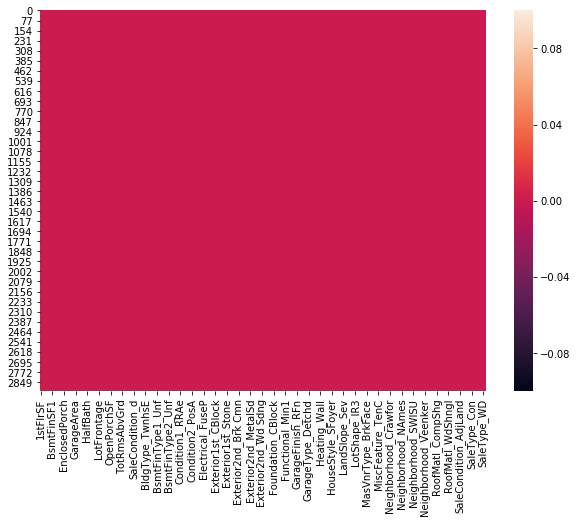

In [78]:
plt.figure(figsize=(10,7))
sns.heatmap(houses_data.isnull())

In [79]:
train_data=houses_data[:x]

In [80]:
test_data=houses_data[x:]

In [81]:
#train_data.SalePrice=np.log1p(train_data.SalePrice)

In [82]:
#data=train_data.select_dtypes(include=np.number).interpolate().dropna()
#test_data=test_data.select_dtypes(include=np.number).interpolate().dropna()

#sum(data.isnull().sum())

In [83]:
#train_data.SalePrice=np.log1p(train_data.SalePrice)

In [84]:
train_data['TotalSuperficial'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
test_data['TotalSuperficial'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']

C:\Users\dusic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dusic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Preparing data for making a prediction

In [85]:
rmse_df=pd.DataFrame(columns=['Alg','RMSE'])

In [86]:
y=train_data.SalePrice
x=train_data.drop(['SalePrice','Id'],axis=1)

x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=13,test_size=.2)
test_data.drop('SalePrice',axis=1,inplace=True)

C:\Users\dusic\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


##### XGBRegressor

In [87]:
import xgboost as xgb
import lightgbm as lgb

In [88]:
lr = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
lr_model=lr.fit(x_train,y_train)
lr_predictions=lr_model.predict(x_test)
print(lr_model.score(x_test,y_test))

C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.8353628591972623


R squared= 0.8353628591972623
RMSE 0.026962577822291785


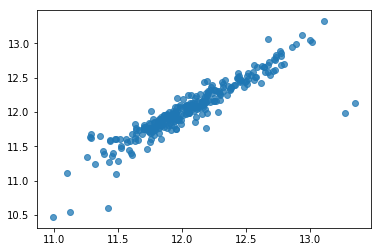

In [89]:
print('R squared=',lr_model.score(x_test,y_test))

rmse_lr=mean_squared_error(y_test,lr_predictions)
print('RMSE',rmse_lr)

rmse_df=rmse_df.append({'Alg':'XGBRegressor','RMSE':rmse_lr}, ignore_index=True)

lr_actual_vals=y_test
plt.scatter(lr_predictions, lr_actual_vals,alpha=.75)
plt.xlabel='Predicted Sale Price'

plt.ylabel='Actual Sale Price'

In [90]:
print(' Predicted \t'+str(np.exp(lr_predictions[10]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[10])))

 Predicted 	92257.13
 Actual 	79001.00000000006


In [91]:
lr_predictions=lr_model.predict(test_data.drop(['Id'],axis=1))
untransformed_preds=np.exp(lr_predictions)

In [92]:
submission=pd.DataFrame()
submission['Id']=test_data.Id



submission['SalePrice']=untransformed_preds
submission.head(5)

,Id,SalePrice
1460,1461,121115.882812
1461,1462,169955.515625
1462,1463,174733.000000
1463,1464,187061.125000
1464,1465,176402.312500


In [93]:
submission.to_csv('submission.csv',index=False)

##### Ridge Linear regression

In [94]:
rm=linear_model.Ridge(alpha=10**2)
ridge_model=rm.fit(x_train,y_train)
ridge_predictions=ridge_model.predict(x_test)
print(lr_model.score(x_test,y_test))

0.8353628591972623


R squared= 0.6503025150456132
RMSE 0.05726985786056348


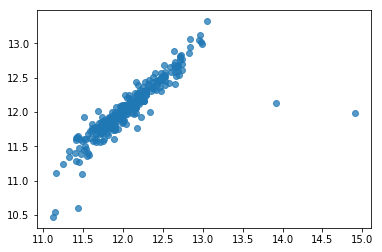

In [95]:
print('R squared=',ridge_model.score(x_test,y_test))

rmse_rlr=mean_squared_error(y_test,ridge_predictions)
print('RMSE',rmse_rlr)
rmse_df=rmse_df.append({'Alg':'Ridge Linear regression','RMSE':rmse_rlr}, ignore_index=True)

ridge_actual_vals=y_test
plt.scatter(ridge_predictions, ridge_actual_vals,alpha=.75)
plt.xlabel='Predicted Sale Price'
plt.ylabel='Actual Sale Price'

In [96]:
print(' Predicted \t'+str(np.exp(ridge_predictions[1]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[1])))

 Predicted 	260127.89351794543
 Actual 	262000.99999999994


In [97]:
print(' Predicted \t'+str(np.exp(ridge_predictions[10]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[10])))

 Predicted 	93955.81100108082
 Actual 	79001.00000000006


In [98]:
predictions_ridge=ridge_model.predict(test_data.drop(['Id'],axis=1))

In [99]:
submission=pd.DataFrame()
submission['Id']=test_data.Id

#features=test_data.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

untransformed_preds=np.exp(predictions_ridge)

print(predictions_ridge[:5],untransformed_preds[:5])

submission['SalePrice']=untransformed_preds

[11.65906664 11.64721354 12.09285337 12.20855947 12.07855375] [115735.95685002 114372.22519459 178590.96693683 200497.9846876
 176055.35673937]


In [100]:
submission.head(5)

,Id,SalePrice
1460,1461,115735.956850
1461,1462,114372.225195
1462,1463,178590.966937
1463,1464,200497.984688
1464,1465,176055.356739


In [101]:
submission.to_csv('submission.csv',index=False)

##### RandomForestRegressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=1000)
rfr_model=rfr.fit(x_train,y_train)
rfr_predictions=rfr_model.predict(x_test)

print(rfr_model.score(x_test,y_test))

0.7957622813557669


R squared= 0.7957622813557669
RMSE 0.03344795321603944


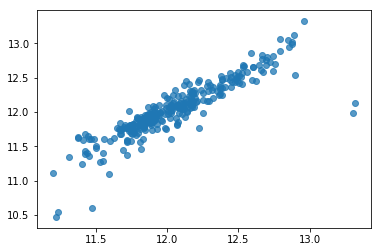

In [103]:
print('R squared=',rfr_model.score(x_test,y_test))

rmse_rfr=mean_squared_error(y_test,rfr_predictions)
print('RMSE',rmse_rfr)
rmse_df=rmse_df.append({'Alg':'RandomForestRegressor','RMSE':rmse_rfr}, ignore_index=True)


plt.scatter(rfr_predictions, y_test,alpha=.75)
plt.xlabel='Predicted Sale Price'
plt.ylabel='Actual Sale Price'

In [104]:
print(' Predicted \t'+str(np.exp(rfr_predictions[1]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[1])))

 Predicted 	264049.58245124796
 Actual 	262000.99999999994


In [105]:
print(' Predicted \t'+str(np.exp(rfr_predictions[10]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[10])))

 Predicted 	101505.88297703033
 Actual 	79001.00000000006


In [106]:
predictions_rfr=rfr_model.predict(test_data.drop(['Id'],axis=1))

In [107]:
submission=pd.DataFrame()
submission['Id']=test_data.Id

#features=test_data.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

untransformed_preds=np.exp(predictions_rfr)

print(predictions_ridge[:5],untransformed_preds[:5])

submission['SalePrice']=untransformed_preds

[11.65906664 11.64721354 12.09285337 12.20855947 12.07855375] [125965.04003466 160283.68406272 174288.12735004 181449.93108076
 187377.48322668]


In [108]:
submission.head()

,Id,SalePrice
1460,1461,125965.040035
1461,1462,160283.684063
1462,1463,174288.127350
1463,1464,181449.931081
1464,1465,187377.483227


##### GradientBoostingRegressor

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,max_depth=4)
gbr_model=gbr.fit(x_train,y_train)
gbr_predictions=gbr_model.predict(x_test)
print(gbr_model.score(x_test,y_test))

0.8115276410352177


R squared= 0.8115276410352177
RMSE 0.03086606473582754


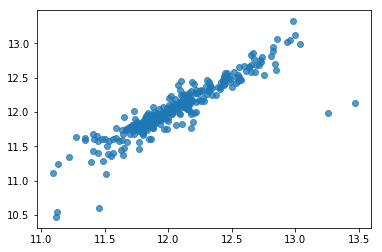

In [110]:
print('R squared=',gbr_model.score(x_test,y_test))
rmse_gbr=mean_squared_error(y_test,gbr_predictions)
print('RMSE',rmse_gbr)
rmse_df=rmse_df.append({'Alg':'GradientBoostingRegressor','RMSE':rmse_gbr}, ignore_index=True)


plt.scatter(gbr_predictions, y_test,alpha=.75)
plt.xlabel='Predicted Sale Price'
plt.ylabel='Actual Sale Price'

In [111]:
print(' Predicted \t'+str(np.exp(gbr_predictions[1]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[1])))

 Predicted 	286003.59691203793
 Actual 	262000.99999999994


In [112]:
p=np.exp(gbr_predictions[10])
a=np.exp(y_test.reset_index().SalePrice[10])
print(' Predicted \t'+str(p)+'\n Actual \t'+str(a))
res_gbr=p-a
print('Residual \t',str(res_gbr))

 Predicted 	88851.32233661525
 Actual 	79001.00000000006
Residual 	 9850.322336615194


In [113]:
predictions_gbr=gbr_model.predict(test_data.drop(['Id'],axis=1))

In [114]:
submission=pd.DataFrame()
submission['Id']=test_data.Id

#features=test_data.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

untransformed_preds=np.exp(predictions_gbr)

print(predictions_ridge[:5],untransformed_preds[:5])

submission['SalePrice']=untransformed_preds

[11.65906664 11.64721354 12.09285337 12.20855947 12.07855375] [125435.52075047 167588.23260252 181057.73555443 191858.20670419
 179730.19946965]


In [115]:
submission.head()

,Id,SalePrice
1460,1461,125435.520750
1461,1462,167588.232603
1462,1463,181057.735554
1463,1464,191858.206704
1464,1465,179730.199470


In [116]:
# From the above algs-Ridge Linear regression is the best on kaggle but on trainset GradientBoostingRegressor is the best?? !

In [117]:
rmse_df.sort_values('RMSE',ascending=True)

,Alg,RMSE
0,XGBRegressor,0.026963
3,GradientBoostingRegressor,0.030866
2,RandomForestRegressor,0.033448
1,Ridge Linear regression,0.057270


In [118]:
def root_mean_squared_error(mse):
    return np.sqrt(mse)

XGBoost :

LightGBM :
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [119]:
################################################################################

# XGBoost -- I did some "manual" cross-validation here but should really find
# these hyperparameters using CV. ;-)

import xgboost as xgb

regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

regr.fit(x_train,y_train)

# Run prediction on training set to get a rough idea of how well it does.
y_pred = regr.predict(x_test)
print("XGBoost score on training set: ", root_mean_squared_error(mean_squared_error(y_test, y_pred)))

C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBoost score on training set:  0.15520223672817082


In [120]:
# Run prediction on the Kaggle test set.
y_pred_xgb = regr.predict(test_data.drop(['Id'],axis=1))

################################################################################

from sklearn.linear_model import Lasso

# I found this best alpha through cross-validation.
best_alpha = 0.00099

regr = make_pipeline(RobustScaler(),Lasso(alpha=best_alpha, max_iter=50000))
regr.fit(x_train,y_train)

# Run prediction on training set to get a rough idea of how well it does.
y_pred = regr.predict(x_test)
print("Lasso score on training set: ",  root_mean_squared_error(mean_squared_error(y_test, y_pred)))

# Run prediction on the Kaggle test set.
y_pred_lasso = regr.predict(test_data.drop(['Id'],axis=1))

################################################################################

# Blend the results of the two regressors and save the prediction to a CSV file.

y_pred = (y_pred_xgb + y_pred_lasso) / 2
y_pred = np.exp(y_pred)

pred_df = pd.DataFrame(y_pred, index=test_data["Id"], columns=["SalePrice"])
pred_df.to_csv('submission.csv', header=True, index_label='Id')

Lasso score on training set:  0.23176343219811452


### Modelling tryout ODJE

In [204]:
#Validation function

def cross_val(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [205]:
#Base models
#LASSO Regression :
#This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
#Elastic Net Regression :
#again made robust to outliers

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00099, l1_ratio=.9, random_state=3))
#Kernel Ridge Regression :
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
#Gradient Boosting Regression :
#With huber loss that makes it robust to outliers

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#XGBoost :
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
#LightGBM :
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [206]:
score = cross_val(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\dusic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Lasso score: 0.1130 (0.0155)



In [124]:
score = cross_val(ENet)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\dusic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\dusic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Lasso score: 0.1130 (0.0155)



C:\Users\dusic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [125]:
score = cross_val(KRR)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\dusic\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.304179e-18
  overwrite_a=False)
C:\Users\dusic\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.520187e-18
  overwrite_a=False)
C:\Users\dusic\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.202031e-18
  overwrite_a=False)
C:\Users\dusic\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.506152e-18
  overwrite_a=False)



Lasso score: 1.1373 (0.9606)



C:\Users\dusic\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.256426e-18
  overwrite_a=False)


In [126]:
score = cross_val(GBoost)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1170 (0.0138)



In [127]:
score = cross_val(model_xgb)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Lasso score: 0.1174 (0.0154)



In [128]:
score = cross_val(model_lgb)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1169 (0.0138)



In [207]:
ENet.fit(x_train,y_train)
GBoost.fit(x_train,y_train)
KRR.fit(x_train,y_train)
lasso.fit(x_train,y_train)
lasso.fit(x_train,y_train)

C:\Users\dusic\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.435364e-19
  overwrite_a=False)


Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [208]:
y1 = ENet.predict(test_data.drop(['Id'],axis=1))

In [209]:
y2 = GBoost.predict(test_data.drop(['Id'],axis=1))
y3 = KRR.predict(test_data.drop(['Id'],axis=1))
y4 = lasso.predict(test_data.drop(['Id'],axis=1))

In [210]:
################################################################################

# Blend the results of the two regressors and save the prediction to a CSV file.
#(models = (ENet, GBoost, KRR, lasso))


# Run prediction on training set to get a rough idea of how well it does.


y_pred = y1*0.4 +y2*0.2+y4*0.4

y_pred = np.exp(y_pred)



In [211]:
y_not_bad = y1/2+y4/2
y_pred_not_bad = np.exp(y_pred)

submission_not_bad=pd.DataFrame()
submission_not_bad['Id']=test_data.Id


submission_not_bad['SalePrice']=y_pred

In [212]:
submission_not_bad.head()

,Id,SalePrice
1460,1461,112460.603647
1461,1462,125923.520532
1462,1463,179501.327252
1463,1464,199625.685290
1464,1465,184357.517896


In [213]:
submission=pd.DataFrame()
submission['Id']=test_data.Id


submission['SalePrice']=y_pred

In [214]:
len(y_pred)

1459

In [215]:
submission.to_csv('submission.csv',index=False)

In [216]:
submission.head()

,Id,SalePrice
1460,1461,112460.603647
1461,1462,125923.520532
1462,1463,179501.327252
1463,1464,199625.685290
1464,1465,184357.517896
